In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
students_data = pd.read_csv('ex2data1.txt', sep=",", header=None)
students_data.columns = ["Exam 1 Score", "Exam 2 Score", "Admitted"]

In [11]:
students_data

,Exam 1 Score,Exam 2 Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [24]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Exam 1 Score  100 non-null    float64
 1   Exam 2 Score  100 non-null    float64
 2   Admitted      100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


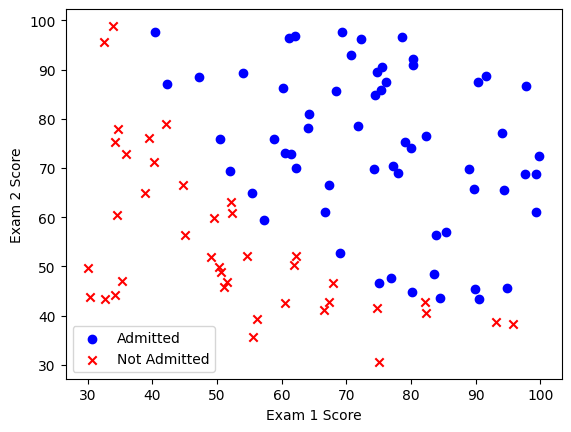

In [23]:
admitted_mask = students_data['Admitted'] == 1
not_admitted_mask = students_data['Admitted'] == 0

plt.scatter(students_data[admitted_mask]['Exam 1 Score'], 
            students_data[admitted_mask]['Exam 2 Score'], 
            marker='o', 
            color='b')
plt.scatter(students_data[not_admitted_mask]['Exam 1 Score'], 
            students_data[not_admitted_mask]['Exam 2 Score'], 
            marker='x', 
            color='r')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(["Admitted" , "Not Admitted"])
plt.show()

In [29]:
def parse_data(data, thetas):
    thetas = np.resize(np.array([theta for theta in thetas]), (len(thetas), 1))
    y = np.resize(np.array(data[data.columns[-1]]), (data.shape[0], 1))

    X = np.array(data[data.columns[:-1]])
    ones_vector = np.resize(np.array([1 for _ in range(data.shape[0])]), (data.shape[0], 1))               
    X = np.hstack((ones_vector,X))

    return X, y, thetas

In [30]:
X, y, thetas = parse_data(data=students_data, thetas=[0, 0])

In [34]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))